In [ ]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install pyyaml ua-parser user-agents

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd

In [ ]:
pip install requests

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install bs4

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import os
import pandas as pd
import time
import re
import seaborn as sns
from lxml import html
import matplotlib as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [ ]:
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

In [ ]:
movies = soup.select('td.titleColumn')
html_text = requests.get('http://www.imdb.com/title/tt0068646/').texthtml_text = requests.get('http://www.imdb.com/title/tt0068646/').textmovies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

In [ ]:
data_frame = {
    "movies": movies,
    "ratings": ratings,
    "crew": crew,
    "links": links
}

data = pd.DataFrame(data_frame)
data


,movies,ratings,crew,links
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295940066258,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156342012096,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989600809037029,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051684475633,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951099637812517,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/
...,...,...,...,...
245,"[\n 246.\n , [Dersu Uzala], \n, [(19...",8.006506967724938,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy So...",/title/tt0071411/
246,"[\n 247.\n , [De IJzeren reus], \n, ...",8.005097695175513,"Brad Bird (dir.), Eli Marienthal, Harry Connic...",/title/tt0129167/
247,"[\n 248.\n , [The Help], \n, [(2011)...",8.005001176467113,"Tate Taylor (dir.), Viola Davis, Emma Stone",/title/tt1454029/
248,"[\n 249.\n , [Aladdin], \n, [(1992)]...",8.00499381869741,"Ron Clements (dir.), Scott Weinger, Robin Will...",/title/tt0103639/


In [ ]:
def process_text_mv(text):
    data = text.get_text().split("\n")
    return data[2].strip()


In [ ]:
def process_text_year(text):
    data = text.get_text().split("\n")
    return data[3].strip()[1:-1]


In [ ]:
data["title"] = data.movies.apply(process_text_mv)
data["year"] = data.movies.apply(process_text_year)


In [ ]:
data.head()


,movies,ratings,crew,links,title,year
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295940066258,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156342012096,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989600809037029,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051684475633,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951099637812517,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957


In [ ]:
data.crew[249]

'Richard Attenborough (dir.), Ben Kingsley, John Gielgud'

In [ ]:
#Задача 1 здесь нашёл уникальные именно имена актёров и режиссёров (все задачи выполнял в колабе)
list45=[]
for i in data.crew:
    a=re.sub(r'.dir..', '\b', i)
    list45.append(str(a))
    
rrr=', '.join(list45)
resftult=re.findall(r'[a-zA-ZôûöéíÇç\-\.*]+\s[a-zA-ZôûöéíÇç\.*]+', rrr)
print(len(set(resftult)))

525


In [ ]:
len(data['crew'].unique())# а здесь я нашёл уникальные ячейки в столбце??? 

246

Text(0.5, 1.0, 'Топ режиссёров по фильмам')

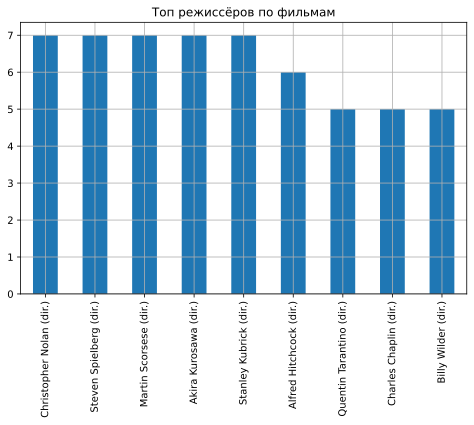

In [ ]:
#Задача 2 (отрисовал только тех режиссёрров, которые встречаются больше 4 раз, поскольку они и так самые топовые)
new=data['crew'].str.split(',', 2, expand=True)
new.index.rename('position', inplace= True )
new.rename(columns={new.columns[0]:'directors', new.columns[1]: "actor1", new.columns[2]: 'actor2' }, inplace = True)

list=new['directors'].tolist()

top_directors=[]
for i in list:
    if list.count(i)>4:
        top_directors.append(i)
top_directors_datafarame = pd.DataFrame(top_directors) 
top_directors_datafarame.rename(columns={top_directors_datafarame.columns[0]:'top directors'}, inplace = True)
y=top_directors_datafarame["top directors"].value_counts().plot.bar(rot=90, grid=True)
y.set_title('Топ режиссёров по фильмам')

Text(0.5, 1.0, 'Топ актёров по фильмам')

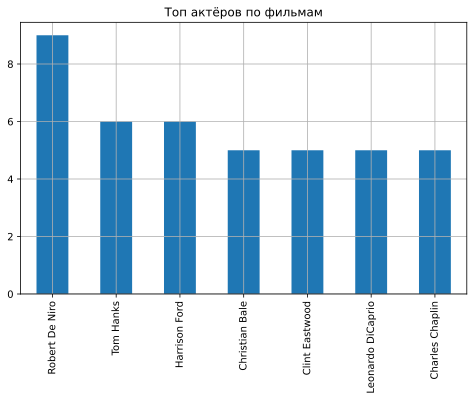

In [ ]:
#Задача 3 (отрисовал только тех актёров, которые встречаются больше 4 раз, поскольку они и так самые топовые)
list2 = new['actor1'].tolist()
list3 = new['actor2'].tolist()
list4=list2+list3
top_actors=[]
for i in list4:
    if list4.count(i)>4:
        top_actors.append(i)
top_actors_datafarame = pd.DataFrame(top_actors) 
top_actors_datafarame.rename(columns={top_actors_datafarame.columns[0]:'top actors'}, inplace = True)
x=top_actors_datafarame["top actors"].value_counts().plot.bar(rot=90, grid=True)
x.set_title('Топ актёров по фильмам')

Text(0.5, 1.0, 'Самые результативные года')

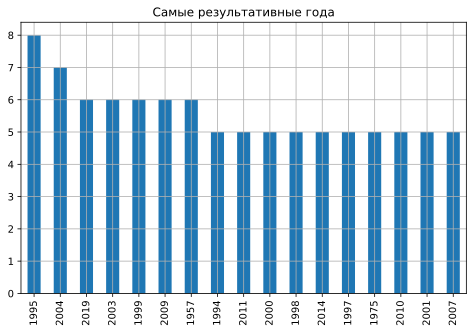

In [ ]:
#Задача 4 (отрисовал только те года, которые встречаются больше 4 раз, поскольку они и так самые топовые)
list5 = data['year'].tolist()
top_years=[]
for i in list5:
    if list5.count(i)>4:
        top_years.append(i)
top_years_datafarame = pd.DataFrame(top_years) 
top_years_datafarame.rename(columns={top_years_datafarame.columns[0]:'top years'}, inplace = True)
z=top_years_datafarame["top years"].value_counts().plot.bar(rot=90, grid=True)
z.set_title('Самые результативные года')

In [ ]:
#Задача 5 (отрисовал только первую половину оценок из датафрэйма, поскольку они и так самые топовые)
list6 = data['ratings'].tolist()
middle=len(list6)/2
middle

125.0

Text(0.5, 1.0, 'Самые популярные оценки среди топовых фильмов (округление до сотых)')

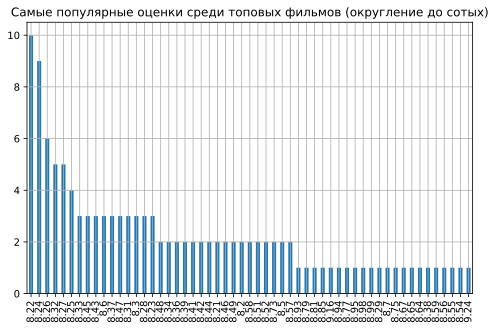

In [ ]:
import numpy as np
list7=list6[:125]
list8 = np.array(list7, float)
round100=[round(x, 2) for x in list8]
top_ratings100_datafarame = pd.DataFrame(round100) 
top_ratings100_datafarame.rename(columns={top_ratings100_datafarame.columns[0]:'top ratings'}, inplace = True)
e=top_ratings100_datafarame["top ratings"].value_counts().plot.bar(rot=90, grid=True)
e.set_title('Самые популярные оценки среди топовых фильмов (округление до сотых)')

Text(0.5, 1.0, 'Самые популярные оценки среди топовых фильмов (округление до десятых)')

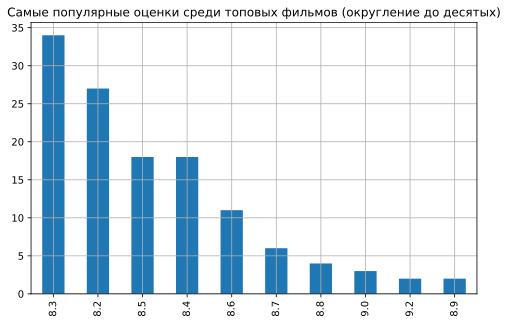

In [ ]:
round10=[round(x, 1) for x in list8]
top_ratings10_datafarame = pd.DataFrame(round10) 
top_ratings10_datafarame.rename(columns={top_ratings10_datafarame.columns[0]:'top ratings'}, inplace = True)
e1=top_ratings10_datafarame["top ratings"].value_counts().plot.bar(rot=90, grid=True)
e1.set_title('Самые популярные оценки среди топовых фильмов (округление до десятых)')

Text(0.5, 1.0, 'Самые популярные оценки среди топовых фильмов (округление до целых)')

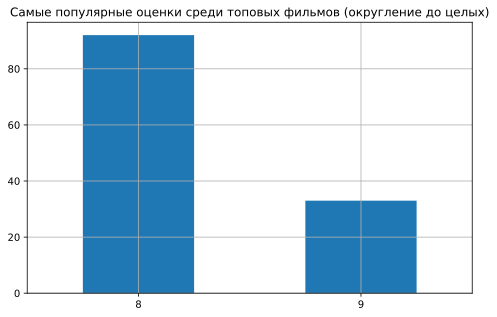

In [ ]:
round1=[round(x) for x in list8]
top_ratings1_datafarame = pd.DataFrame(round1) 
top_ratings1_datafarame.rename(columns={top_ratings1_datafarame.columns[0]:'top ratings'}, inplace = True)
e1_=top_ratings1_datafarame["top ratings"].value_counts().plot.bar(rot=0, grid=True)
e1_.set_title('Самые популярные оценки среди топовых фильмов (округление до целых)')

In [ ]:
#Задача 6
def find_description(i):
    html_texty = requests.get(i, headers={'User-Agent': "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"}).text
    soupy = BeautifulSoup(html_texty, 'lxml')
    d=soupy.find_all(attrs={"name": "description"})[0].get("content")
    return(d)

In [ ]:
list9 = data['links'].tolist()
list10=[]
for o in list9:
    list10.append('http://www.imdb.com'+o)

In [ ]:
list11=[find_description(i) for i in list10]
descript=pd.DataFrame(list11)
descript.rename(columns={descript.columns[0]:'Описание'}, inplace=True)
res2=pd.concat([data, descript], axis=1)
res2

,movies,ratings,crew,links,title,year,Описание
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295940066258,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,The Shawshank Redemption: Directed by Frank Da...
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156342012096,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,The Godfather: Directed by Francis Ford Coppol...
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989600809037029,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,The Dark Knight: Directed by Christopher Nolan...
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051684475633,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,The Godfather Part II: Directed by Francis For...
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951099637812517,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,De 12 gezworenen: Directed by Sidney Lumet. Wi...
5,"[\n 6.\n , [Schindler's List], \n, [...",8.938300614232054,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi...",/title/tt0108052/,Schindler's List,1993,Schindler's List: Directed by Steven Spielberg...
6,"[\n 7.\n , [The Lord of the Rings: T...",8.92907254251842,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",/title/tt0167260/,The Lord of the Rings: The Return of the King,2003,The Lord of the Rings: The Return of the King:...
7,"[\n 8.\n , [Pulp Fiction], \n, [(199...",8.848169169292873,"Quentin Tarantino (dir.), John Travolta, Uma T...",/title/tt0110912/,Pulp Fiction,1994,Pulp Fiction: Directed by Quentin Tarantino. W...
8,"[\n 9.\n , [The Lord of the Rings: T...",8.808929736276239,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",/title/tt0120737/,The Lord of the Rings: The Fellowship of the Ring,2001,The Lord of the Rings: The Fellowship of the R...
9,"[\n 10.\n , [The Good, the Bad and t...",8.790635503794455,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",/title/tt0060196/,"The Good, the Bad and the Ugly",1966,"The Good, the Bad and the Ugly: Directed by Se..."


In [ ]:
#Задача 7
fstring=''.join(list11)
resfusssdsd=re.findall(r'With [a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*]+,*\.*\-*\s*[a-zA-ZóôûöéíÇçїåøüèóÁ\-*\.*,*],*\.*\-*\s*', fstring)
withactors=pd.DataFrame(resfusssdsd)
withactors.rename(columns={withactors.columns[0]:'Actors'}, inplace=True)
res4=pd.concat([res2, withactors], axis=1)
pd.set_option('display.max_rows', None)
res4

,movies,ratings,crew,links,title,year,Описание,Actors
0,"[\n 1.\n , [The Shawshank Redemption...",9.235295940066258,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",/title/tt0111161/,The Shawshank Redemption,1994,The Shawshank Redemption: Directed by Frank Da...,"With Tim Robbins, Morgan Freeman, Bob Gunton, ..."
1,"[\n 2.\n , [The Godfather], \n, [(19...",9.156156342012096,"Francis Ford Coppola (dir.), Marlon Brando, Al...",/title/tt0068646/,The Godfather,1972,The Godfather: Directed by Francis Ford Coppol...,"With Marlon Brando, Al Pacino, James Caan, Ric..."
2,"[\n 3.\n , [The Dark Knight], \n, [(...",8.989600809037029,"Christopher Nolan (dir.), Christian Bale, Heat...",/title/tt0468569/,The Dark Knight,2008,The Dark Knight: Directed by Christopher Nolan...,"With Christian Bale, Heath Ledger, Aaron Eckha..."
3,"[\n 4.\n , [The Godfather Part II], ...",8.984051684475633,"Francis Ford Coppola (dir.), Al Pacino, Robert...",/title/tt0071562/,The Godfather Part II,1974,The Godfather Part II: Directed by Francis For...,"With Al Pacino, Robert Duvall, Diane Keaton, R..."
4,"[\n 5.\n , [De 12 gezworenen], \n, [...",8.951099637812517,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",/title/tt0050083/,De 12 gezworenen,1957,De 12 gezworenen: Directed by Sidney Lumet. Wi...,"With Martin Balsam, John Fiedler, Lee J. Cobb,..."
5,"[\n 6.\n , [Schindler's List], \n, [...",8.938300614232054,"Steven Spielberg (dir.), Liam Neeson, Ralph Fi...",/title/tt0108052/,Schindler's List,1993,Schindler's List: Directed by Steven Spielberg...,"With Liam Neeson, Ben Kingsley, Ralph Fiennes,..."
6,"[\n 7.\n , [The Lord of the Rings: T...",8.92907254251842,"Peter Jackson (dir.), Elijah Wood, Viggo Morte...",/title/tt0167260/,The Lord of the Rings: The Return of the King,2003,The Lord of the Rings: The Return of the King:...,"With Noel Appleby, Ali Astin, Sean Astin, Davi..."
7,"[\n 8.\n , [Pulp Fiction], \n, [(199...",8.848169169292873,"Quentin Tarantino (dir.), John Travolta, Uma T...",/title/tt0110912/,Pulp Fiction,1994,Pulp Fiction: Directed by Quentin Tarantino. W...,"With Tim Roth, Amanda Plummer, Laura Lovelace,..."
8,"[\n 9.\n , [The Lord of the Rings: T...",8.808929736276239,"Peter Jackson (dir.), Elijah Wood, Ian McKellen",/title/tt0120737/,The Lord of the Rings: The Fellowship of the Ring,2001,The Lord of the Rings: The Fellowship of the R...,"With Alan Howard, Noel Appleby, Sean Astin, Sa..."
9,"[\n 10.\n , [The Good, the Bad and t...",8.790635503794455,"Sergio Leone (dir.), Clint Eastwood, Eli Wallach",/title/tt0060196/,"The Good, the Bad and the Ugly",1966,"The Good, the Bad and the Ugly: Directed by Se...","With Eli Wallach, Clint Eastwood, Lee Van Clee..."


In [ ]:
if len(res4.Actors)==len(res4.title):
  print('Имена актёров упоминаются в описаниях ко всем фильмам')
else:
  print('нет')



Имена актёров упоминаются в описаниях ко всем фильмам


In [ ]:
#Задача 8
film_urls='http://www.imdb.com/chart/top'
html_text = requests.get(film_urls, headers={'User-Agent': "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"}).text
soup3 = BeautifulSoup(html_text, 'lxml')
qw=soup.find_all('strong')

list12=[]
for i in qw:
    list12.append(str(i))
    string = ''.join(list12)

result=re.findall(r'[0-9]*,*[0-9][0-9][0-9]*,[0-9][0-9][0-9]*', string)
g = ';'.join(result)
g1=re.sub(r',', '', g)
dr=re.split(r';', g1)

result25 = [int(item) for item in dr]
users=pd.DataFrame(result25)
users.rename(columns={users.columns[0]:'количество оценок'}, inplace = True)
res = pd.concat([data, users],axis=1)
res1=res.sort_values(['количество оценок'], ascending=[False])
res1.iloc[0:10, 4:]

,title,year,количество оценок
0,The Shawshank Redemption,1994,2672206
2,The Dark Knight,2008,2645058
13,Inception,2010,2344547
11,Fight Club,1999,2117637
10,Forrest Gump,1994,2072126
7,Pulp Fiction,1994,2047201
15,The Matrix,1999,1908650
8,The Lord of the Rings: The Fellowship of the Ring,2001,1870856
1,The Godfather,1972,1851981
6,The Lord of the Rings: The Return of the King,2003,1841599
